<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Time_Series_Exploratory_Data_Aanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Time Series analysis is Important For us ?

In this, I am going to die detail into a data analysis of time series because data analysis is very keen in time series data are there are multiple factors to a ton of time-series problem can be solved by property data analysis and when it ok for data analysis we serve both Statistical Techniques as well as exploratory data analysis and it is used to find patterns in data as well as the structure of the data when we say pattern you are we are trying to understand if the data are some seasonality if there is an increasing or decreasing trend in the data to the data stationary or non-stationary is all very important because I want to get into the modelling part of a lot of the underlying models and assumption of the data being linear or data being non-stationary important we analyze the data. 
the data may contain a lot of missings values in the typical world about to the missing we fill the missing values with mean and median, median or other techniques or drop the data. 
 But when it comes to time-series data now it's very important to understand the structure of data so that we can use the right to imputation. 

We can not drop the data because the order of the event that are happening in time series world is very important to us so we can not have a missing event. 

 We can in some modelling technique but we retain our continuous event. 

and see what is right substitution technique.

!pip install download

In [4]:
from __future__ import absolute_import, division, print_function,unicode_literals
# __future__ is a real module, and serves three purposes: To avoid confusing existing tools that analyze import statements and expect to find the modules they're importing.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from download import download
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid']=False

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
path='C:/Users/Microsoft/Downloads'

In [20]:
data = download(url,path,kind='zip',replace=True)


file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 5.75MB/s]
Extracting zip file...
Successfully downloaded / unzipped to C:/Users/Microsoft/Downloads


In [27]:
data = pd.read_csv('/content/C:/Users/Microsoft/Downloads/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',encoding='ISO-8859-1')

In [23]:
data.head()

No  year  month  day  hour  PM2.5  ...    PRES  DEWP  RAIN   wd  WSPM   station
0   1  2013      3    1     0    4.0  ...  1020.8 -19.7   0.0    E   0.5  Dingling
1   2  2013      3    1     1    7.0  ...  1021.3 -19.0   0.0  ENE   0.7  Dingling
2   3  2013      3    1     2    5.0  ...  1021.3 -19.9   0.0  ENE   0.2  Dingling
3   4  2013      3    1     3    6.0  ...  1021.8 -19.1   0.0  NNE   1.0  Dingling
4   5  2013      3    1     4    5.0  ...  1022.3 -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In this we are going to choose the target as  PM2.5 values.

It is Time series data on the Hourly basis.

summary about this data :-

- so2 - Sulphurdioxide
- No2 - Nitrogenoxide
- Co - Carbon monooxide
- o3  - Ozone
- TEMP - Temperature
- Pressure - Pressure
- DEWp - dew point temperature..
- Rain - Rain percipitation
- wd - Wind direction.
- WSPM - Wind Direction.
- Station - Location.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
def convert_to_date(X):
  from datetime import datetime
  return datetime.strptime(X,'%Y %m %d %H')

In [42]:
data = pd.read_csv('/content/C:/Users/Microsoft/Downloads/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)

In [43]:
data.head()

year_month_day_hour  No  year month day  ...  DEWP  RAIN   wd  WSPM   station
0 2013-03-01 00:00:00   1  2013     3   1  ... -19.7   0.0    E   0.5  Dingling
1 2013-03-01 01:00:00   2  2013     3   1  ... -19.0   0.0  ENE   0.7  Dingling
2 2013-03-01 02:00:00   3  2013     3   1  ... -19.9   0.0  ENE   0.2  Dingling
3 2013-03-01 03:00:00   4  2013     3   1  ... -19.1   0.0  NNE   1.0  Dingling
4 2013-03-01 04:00:00   5  2013     3   1  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 19 columns]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [45]:
data['month'] = pd.to_numeric(data['month'])

In [47]:
print('Rows :',data.shape[0])
print()
print('Columns :',data.shape[1])
print()
print('Features :',data.columns.to_list())
print()
print('Missing Values :',data.isnull().any())
print()
print('Unique values :',data.nunique())

Rows : 35064

Columns : 19

Features : ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing Values : year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values : year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    48

# Decriptive Stastics

In [48]:
round(data.describe(),1)

No    month    PM2.5     PM10  ...     PRES     DEWP     RAIN     WSPM
count  35064.0  35064.0  34285.0  34408.0  ...  35014.0  35011.0  35013.0  35021.0
mean   17532.5      6.5     66.0     83.7  ...   1007.8      1.5      0.1      1.9
std    10122.2      3.4     72.3     79.5  ...     10.2     13.8      0.8      1.3
min        1.0      1.0      3.0      2.0  ...    982.4    -35.1      0.0      0.0
25%     8766.8      4.0     14.0     26.0  ...    999.3    -10.2      0.0      1.0
50%    17532.5      7.0     41.0     60.0  ...   1007.4      1.8      0.0      1.5
75%    26298.2     10.0     93.0    117.0  ...   1016.0     14.2      0.0      2.3
max    35064.0     12.0    881.0    905.0  ...   1036.5     27.2     52.1     10.0

[8 rows x 13 columns]

- We can see over here that the Temperature is vary from -16.6 to 41.4
- PM2.5 is also high 881 and then low as temperature down to 1.

In the similar fashion we can get all the descriptive analysis of the data.

In [49]:
data1 = data.copy()

In [51]:
data1 = data1.set_index('year_month_day_hour')

In [54]:
data1.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [55]:
data1.head()

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                            ...                                 
2013-03-01 00:00:00   1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00   2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00   3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00   4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00   5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [57]:
data1.loc['2013-03-01 00:00:00':'2013-03-01 09:00:00']

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                            ...                                 
2013-03-01 00:00:00   1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00   2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00   3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00   4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00   5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling
2013-03-01 05:00:00   6  2013      3   1    5  ... -19.5   0.0  NNW   1.7  Dingling
2013-03-01 06:00:00   7  2013      3   1    6  ... -19.5   0.0  NNW   1.8  Dingling
2013-03-01 07:00:00   8  2013      3   1    7  ... -20.0   0.0   NW   2.5  Dingling
2013-03-01 08:00:00   9  2013      3   1    8  ... -20.5   0.0  NNW   2.8  Dingling
2013-03-01 09:00:00  10  2013      3   1    9  ... -20.4   0.0  NNW   3.8  Dingling

[10 rows x 18 columns]

In [58]:
data1['2013':'2015']

No  year  month day  ... RAIN   wd  WSPM   station
year_month_day_hour                          ...                          
2013-03-01 00:00:00      1  2013      3   1  ...  0.0    E   0.5  Dingling
2013-03-01 01:00:00      2  2013      3   1  ...  0.0  ENE   0.7  Dingling
2013-03-01 02:00:00      3  2013      3   1  ...  0.0  ENE   0.2  Dingling
2013-03-01 03:00:00      4  2013      3   1  ...  0.0  NNE   1.0  Dingling
2013-03-01 04:00:00      5  2013      3   1  ...  0.0    N   2.1  Dingling
...                    ...   ...    ...  ..  ...  ...  ...   ...       ...
2015-12-31 19:00:00  24860  2015     12  31  ...  0.0   NE   0.6  Dingling
2015-12-31 20:00:00  24861  2015     12  31  ...  0.0   NW   1.1  Dingling
2015-12-31 21:00:00  24862  2015     12  31  ...  0.0   NE   0.9  Dingling
2015-12-31 22:00:00  24863  2015     12  31  ...  0.0  NNW   1.3  Dingling
2015-12-31 23:00:00  24864  2015     12  31  ...  0.0  NNW   1.3  Dingling

[24864 rows x 18 columns]

In [60]:
pm_data = data1['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

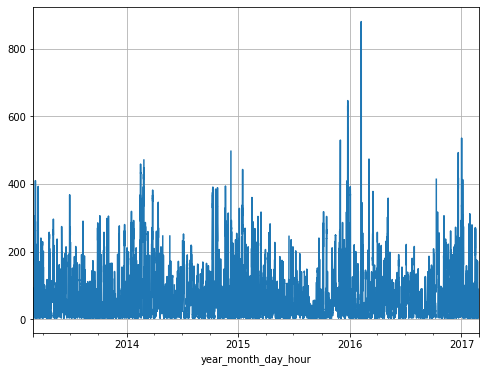

In [61]:
pm_data.plot(grid=True)

- In this data we can see the data is containing the ups and down along the years.
- So,in order to visualize the data we can get the proper inference to each and every year.
- For this resean we just make guessment on visualization of data.
- Here we can see the data having the High outliers in the year 2016 as compare to other.
- It is also contains some spike on the other year also but not that much as much 2016 having.

- So in order to plot the same graph on the yearly basis we can do it 
- let's see..

---



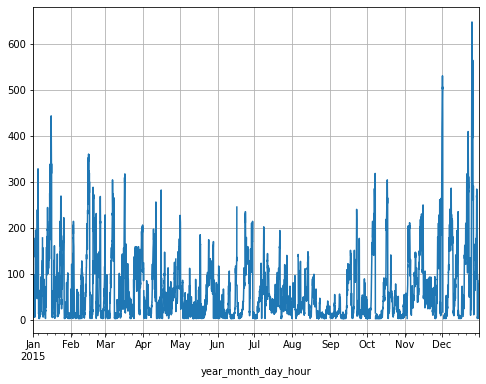

In [65]:
data1_2015 = data1.loc['2015']
pm2015 = data1_2015['PM2.5']
pm2015.plot(grid=True)
plt.show()

If we can see here the in year of 2015.The PM 2.5 is decreasing from 400 to less than 100 in between the month jan to sep.

Then It suddenly start increasing at the high rate from sept to Dec.

We will see the 2016 will follow similar pattern or not ..?

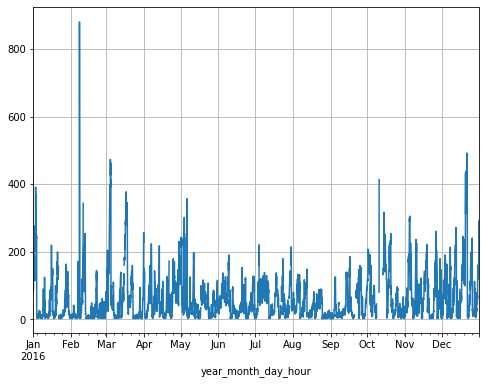

In [64]:
data1_2016 = data1.loc['2016']
pm2016 = data1_2016['PM2.5']
pm2016.plot(grid=True)
plt.show()

- In the year 2016 that seasonality we havn't seen here.
- But we can see the pm2.5 got resonably decrease.
- Even we have some sort of trend over here also.

## Plotly Visualization.

We are going to use the Plotly express in order to get the efficient way plotting.

In [68]:
import plotly.express as px
fig = px.line(data,x='year_month_day_hour',y='PM2.5',title='Slider Of 2.5')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

**Again we will visualize the data with some button application so we will get the distribution seperately of the data in one press.**


In [69]:
import plotly.express as px
fig = px.line(data,x='year_month_day_hour',y='PM2.5',title='Slider Of 2.5')

fig.update_xaxes(rangeslider_visible=True,rangeselector = dict(buttons=list([
                                                                             
                          dict(count=1,label='1y',step='year',stepmode='backward'),
                          dict(count=1,label='2y',step='year',stepmode='backward'), 
                          dict(count=1,label='3y',step='year',stepmode='backward'),
                          dict(step='all') ])))                                                
fig.show()

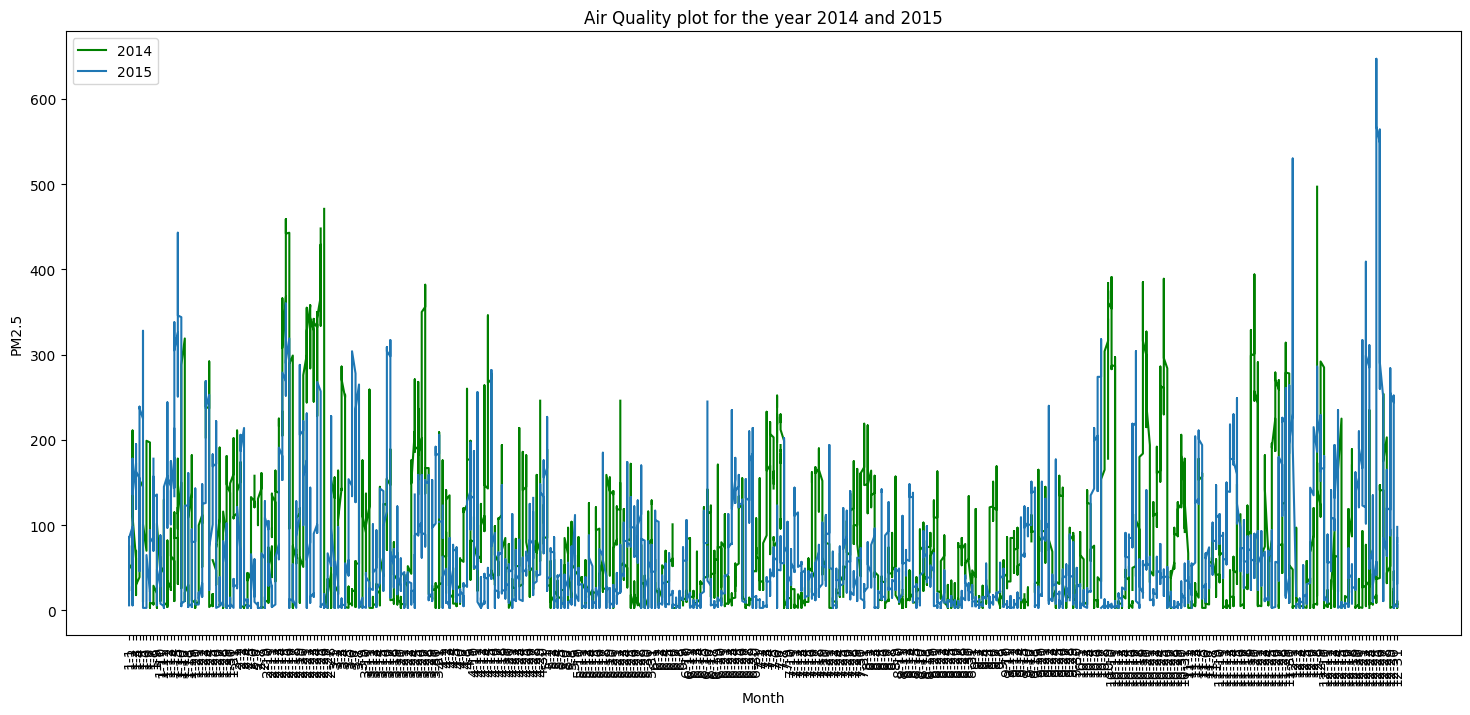

In [83]:
df_2014 = data1['2014'].reset_index()
df_2015 = data1['2015'].reset_index()
df_2014['year_month_day_hour'] = df_2014.apply(lambda x:str(x['month'])+'-'+x['day'],axis=1 )
df_2015['year_month_day_hour'] = df_2015.apply(lambda x:str(x['month'])+'-'+x['day'],axis=1 )
plt.figure(figsize=(18,8),dpi=100)
plt.plot(df_2014['year_month_day_hour'],df_2014['PM2.5'],color='g')
plt.plot(df_2015['year_month_day_hour'],df_2015['PM2.5'])
plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')
plt.show()

- In the above figure we can see the 2014 and 2015.
- The PM2.5 is very on the common basis in middle months.
- 2014 at the end it is increasing at very mangnitude as compare to the 2015.
- In the initial of the year the 2015 was also at its high peak.

In [90]:
data1['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

- If we see the above the descriptive analysis in between the years 2014 - 2016.
In that we are finding the some dessscriptive information about the PM2.5.If we see the how mean is changing monthwise along the dates.

- these are the values are represnting the values trend as we had visualized above.

In [91]:
data1['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

Here,we are getting the data which is showing that the max PM2.5 and TEMP with min and max aggregation.


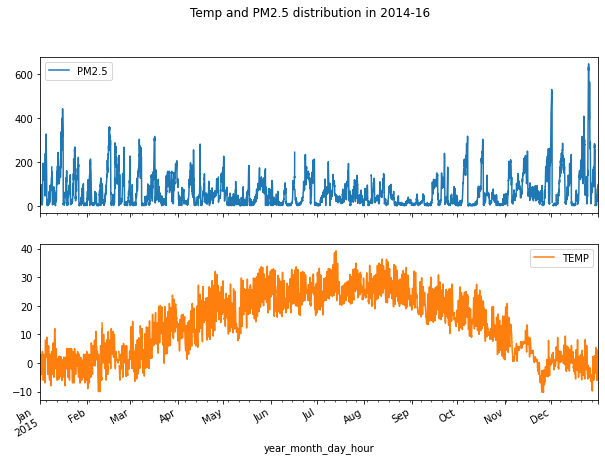

In [96]:
Pm_temp_data = data1['2015']
Pm_temp_data = Pm_temp_data[['PM2.5','TEMP']]
Pm_temp_data.plot(subplots=True,title='Temp and PM2.5 distribution in 2014-16',figsize=(10,7))
plt.show()

In that we can see,

The PM2.5 goes high at the low temp but after that it is decreases on that time temp was high.

At the month nov,dec the values of the PM2.5 is its high even TEMP is low.

The winter season having the low temp even the values of PM2.5 is it's high peak.

From that we can say the PM2.5 is high in winter at low temp.

https://weather.com/en-IN/india/science/news/2018-10-30-why-do-pollution-levels-skyrocket-during-winter

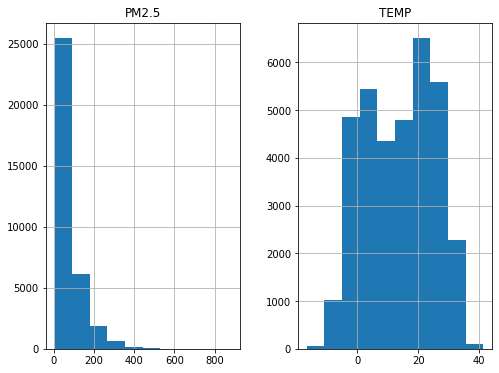

In [103]:
data1[['PM2.5','TEMP']].hist()
plt.show()
#we can see there is the PM2.5 and temp distribution 
# In the PM2.5 the distribution there is righ skewed distribution that is covering the 0 to 100 at the high pm2.5 values than the other.
#In the TEMp we can there is Bimodel distribution is avalible that is helping to show it's dense region inbetween the 0 to 30 all time high.

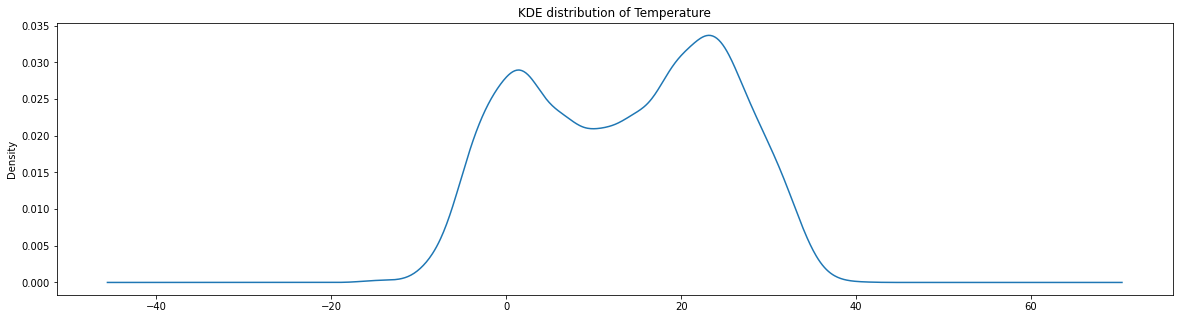

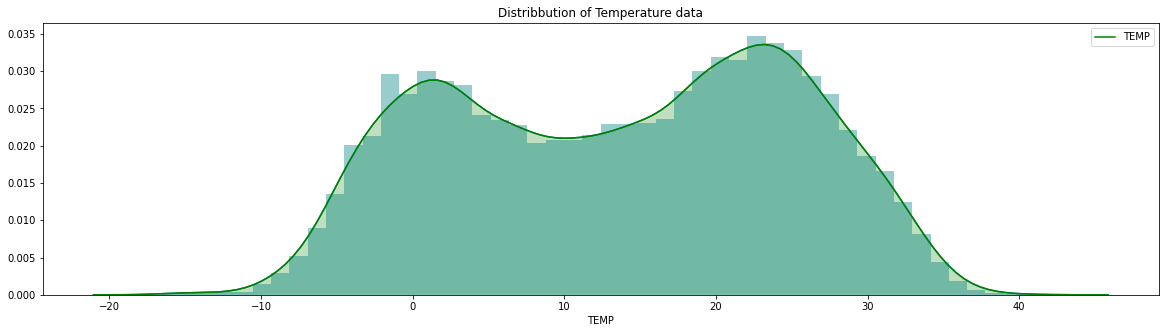

In [107]:
plt.figure(figsize=(20,5))
data1['TEMP'].plot(kind='kde',title='KDE distribution of Temperature')
plt.show()
plt.figure(figsize=(20,5))
ax = sns.distplot(data1['TEMP'],color='teal')
sns.kdeplot(data1['TEMP'],shade=True,color='g')
plt.title('Distribbution of Temperature data')
plt.show()
#Here the kernel distribution is avalible that is indicating the its area in the respect of data avaliblity in volume.

## Lag Plot.

lag plot is kind of scatter plot .by defaut lag period is one it is called First order lag plot similarly for the lag=2 we called that second order lag plot and so on.

It is linear regression as just .It is for autoregression model probably better choice. 

By using this we can check 

 - Linearity 

 - Outliers 
 - Randomness 
 - Wheater there is serial correlation or auto-correlation 

x axis :- is the curremt time 

y axis :- is lag period 




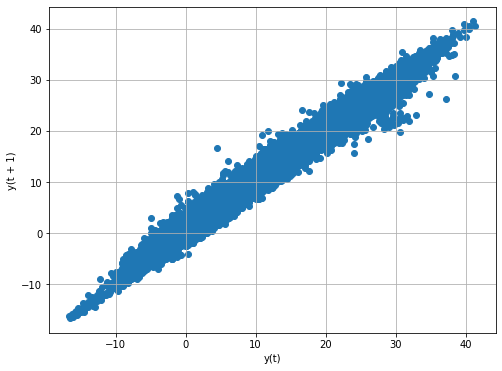

In [110]:
pd.plotting.lag_plot(data['TEMP'],lag=1)
plt.grid()
plt.show()

**Here,we are getting very positive correlation obtained because lag one.It is obviously high auto-correlated of itself with same data as `lag=1.`**

In the above we can see our data is changes with hourly.

So at the x axis when we will get the observation of 12 o'clock.It will reflect that observation 11 o'clock at the y-axis.

For getting the correlation between two entity we use then pearson-correlation.
But if we want to calculate the correlation of itself or autocorrelation of each entity we use lag.

as the lag increases the frequecy of the data is distributed according to that.

When lag is equal to one shows one day or one hour lag over the period of time period.

As the lag period increases the lag period will gives the postive auto-correlation or Negetive-Correlation.

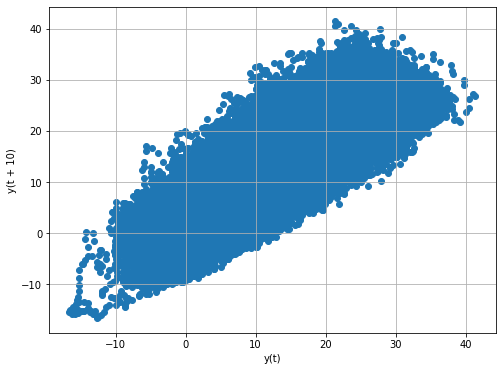

In [113]:
pd.plotting.lag_plot(data['TEMP'],lag=10)
plt.grid()
plt.show()
#here the data is not so much correlated but it is postive correlateed and also It is showing that data is well centered with zero.variance is high.

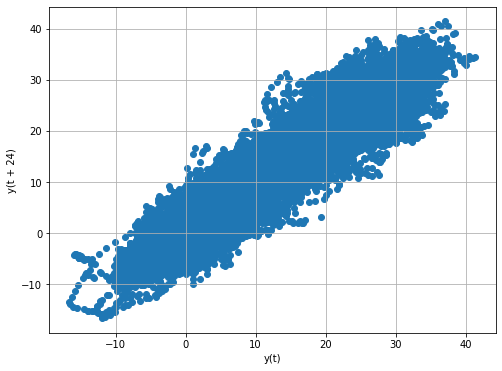

In [114]:
pd.plotting.lag_plot(data['TEMP'],lag=24)
plt.grid()
plt.show()

#This is showing 24 or daily hours data autocorrelation is postive autocorrelation with well centered with zero.variance is low compare to 10 hours lag

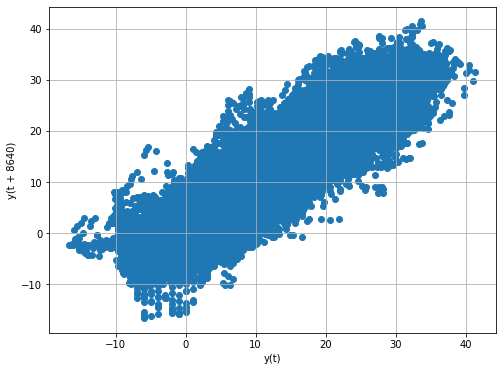

In [116]:
pd.plotting.lag_plot(data['TEMP'],lag=8640)
plt.grid()
plt.show()


#24*365 = 8640 it is nothing but the yearly correlation.It is indicating that data is still remain positive auto-correlated with high variance but cetered with zero.

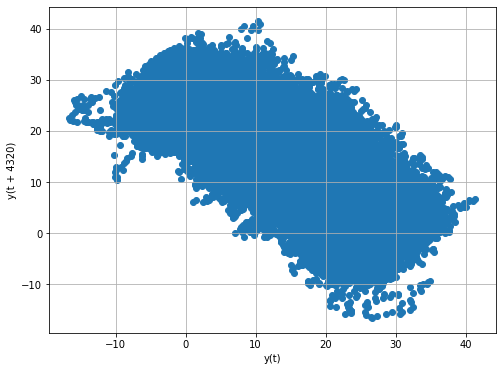

In [118]:
pd.plotting.lag_plot(data['TEMP'],lag=4320)
plt.grid()
plt.show()
#Here,we can see the we have got **Negetive Autocorrelation**
#Since the hours are of 6 months.
#It is indicated that every six month the Autocorrelation is not postive.
#Since it is indicates that there is inverse correlation obtained.

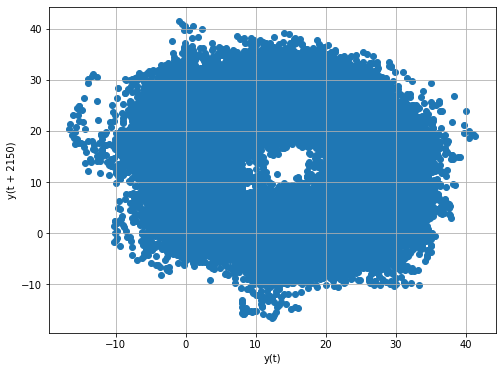

In [119]:
pd.plotting.lag_plot(data['TEMP'],lag=2150)
plt.grid()
plt.show()

#2150 hours is 3 months 
#It is showing that we are getting the any correlation with 3 months hours 
#That is indicating the we can predict what will happen in 3 months because of some autocorrelation uncartainity.

## Now plot with TEMP,PRESSURE and PM2.5 values.

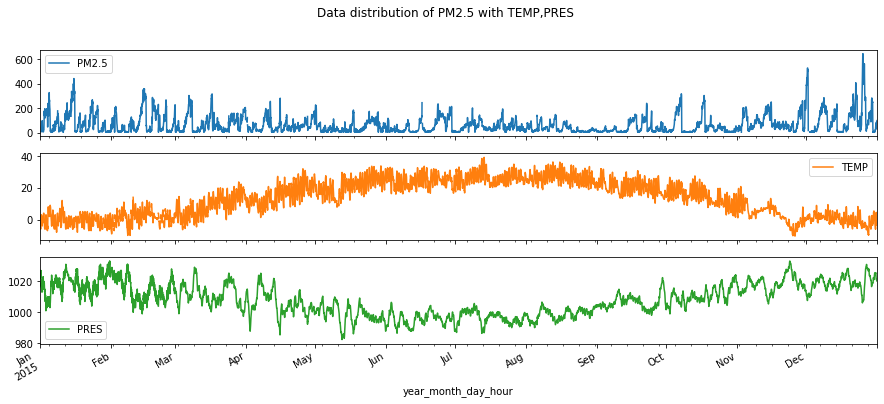

In [122]:
data2015 = data1['2015'][['PM2.5','TEMP','PRES']]
data2015.plot(subplots=True,figsize=(15,6),title='Data distribution of PM2.5 with TEMP,PRES')
plt.show()

- In the above we can see that at initial as PM2.5 is raises the TEMP went down and Pressure increased.

- At the middle portion the PM2.5 is at loweest peak that time TEMP was at its highest peak and Pressure at it's low peak.


- At End of year the PM2.5 at it's best that temperature is at lowest peak but the pressure is at the highest peak.







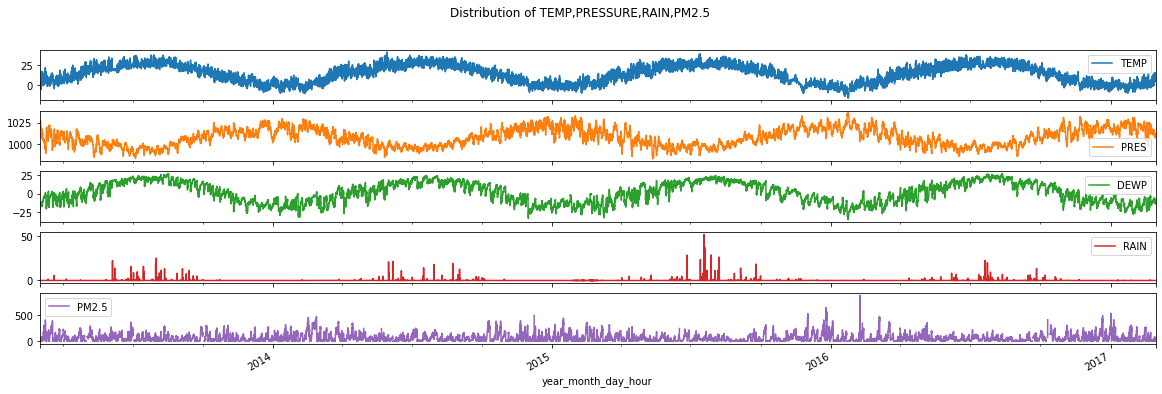

In [125]:
multi_data = data1[['TEMP','PRES','DEWP','RAIN','PM2.5']]
multi_data.plot(subplots=True,figsize=(20,6),title='Distribution of TEMP,PRESSURE,RAIN,PM2.5')
plt.show()

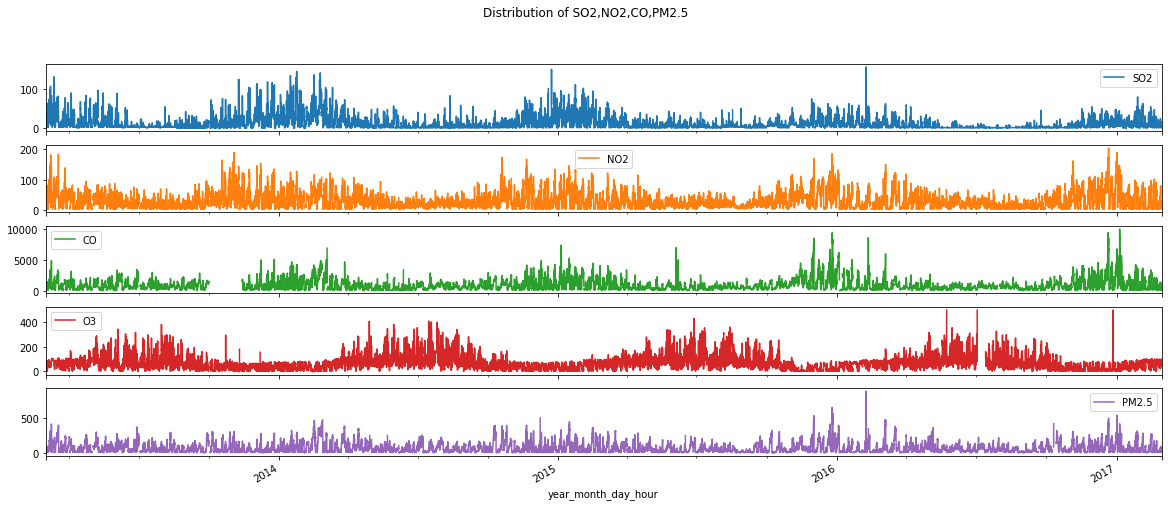

In [128]:
multi_data = data1[['SO2','NO2','CO','O3','PM2.5']]
multi_data.plot(subplots=True,figsize=(20,8),title='Distribution of SO2,NO2,CO,PM2.5')
plt.show()

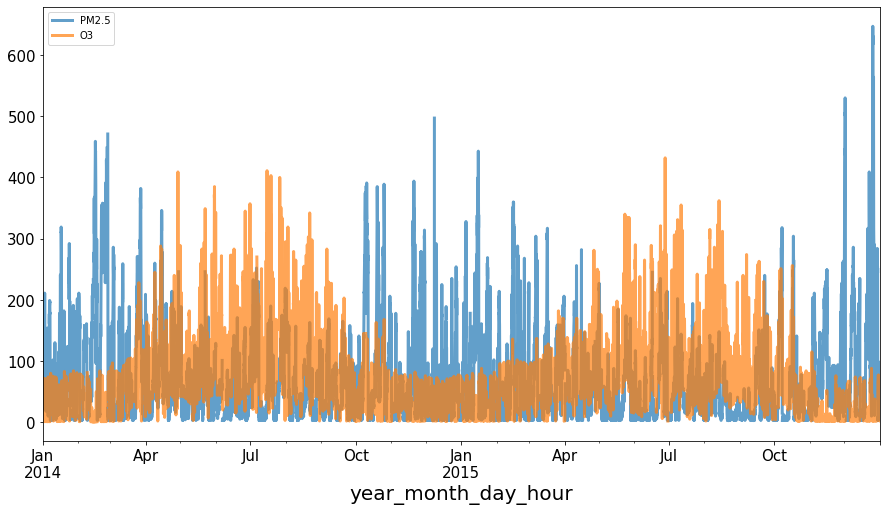

In [138]:
data14_15 = data1['2014':'2015'][['PM2.5','O3']]
data14_15.plot(figsize=(15,8),linewidth=3,fontsize=15,alpha=0.7)
plt.xlabel('year_month_day_hour',fontsize=20)
plt.show()

If we see here in between the year 2014 and 2015.
The whenver the PM2.5 decreases that time O2 is increases.
Since there is some negetive correlation.

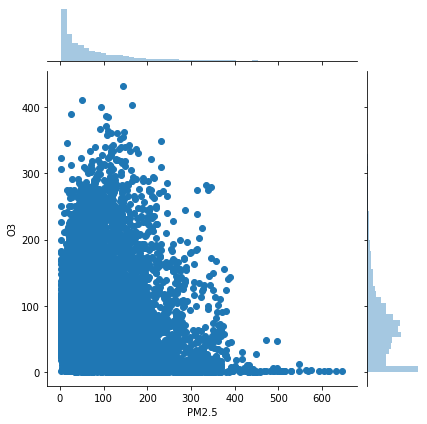

In [145]:
sns.jointplot(x='PM2.5',y='O3',kind='scatter',data=data14_15)
plt.show()

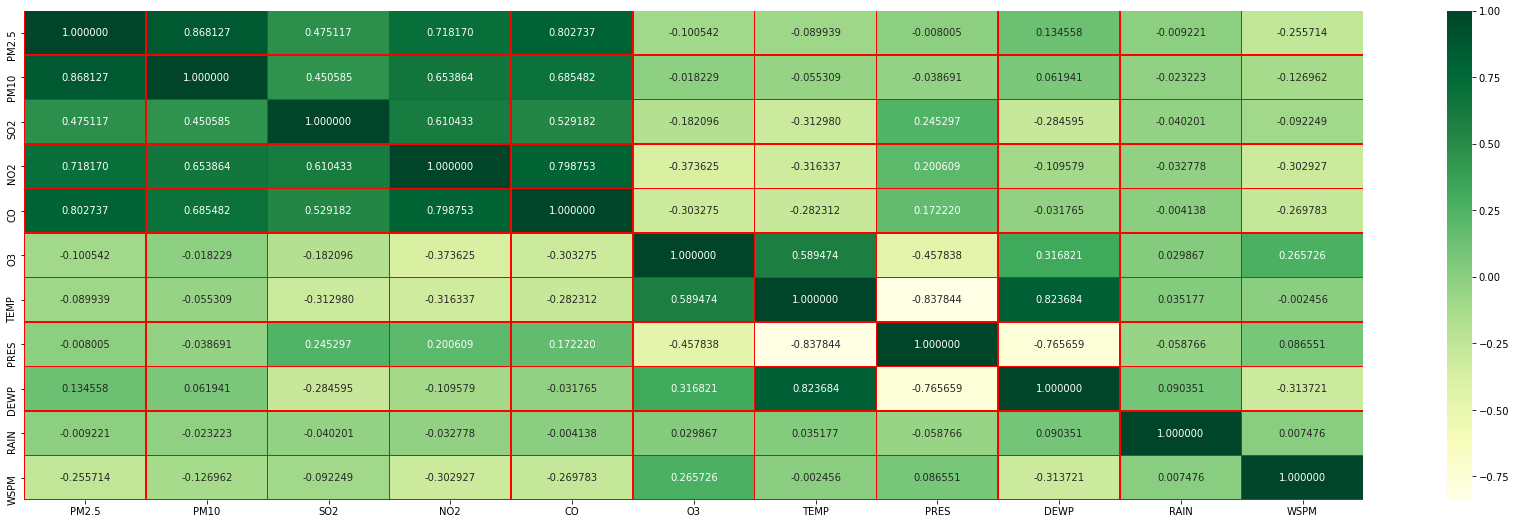

In [153]:
plt.figure(figsize=(30,9))
data_corr= data.drop(columns=['year_month_day_hour','No','year','month','day','hour','station','wd']).corr()
sns.heatmap(data_corr,cmap='YlGn',annot=True,fmt='f',linewidths=0.6,linecolor='r')
plt.show()
#If we can see there is high correlation :- CO,SO2,PM10,PM2.5 are mutually highly positively correlated to each other
#Pressure is Negetively correlated with temperature..
#DPWP is negetively correlated with Pressure thats indicates the temp and DPWP are mutually highly positively correlated to each other.

In [154]:
data1_2015['PM2.5'] #If we see over here that the Lot of null values are present.
#In that we can see we can't drop that null values if we do that we will loss our continuity in the Time Series.

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

## We will think about the Null values as well.

In [158]:
data1_2015.head()
#If we see over here the lot of null values are present.
#sometimes what happened the sensor won't work properly or stop to work for the some period of time.

No  year  month day  ... RAIN   wd  WSPM   station
year_month_day_hour                          ...                          
2015-01-01 00:00:00  16105  2015      1   1  ...  0.0   NW   3.3  Dingling
2015-01-01 01:00:00  16106  2015      1   1  ...  0.0  NNE   1.2  Dingling
2015-01-01 02:00:00  16107  2015      1   1  ...  0.0  NNW   1.7  Dingling
2015-01-01 03:00:00  16108  2015      1   1  ...  0.0    N   1.7  Dingling
2015-01-01 04:00:00  16109  2015      1   1  ...  0.0   NE   1.8  Dingling

[5 rows x 18 columns]

In [163]:
data1.isnull().sum().any()

True

In [164]:
data1.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

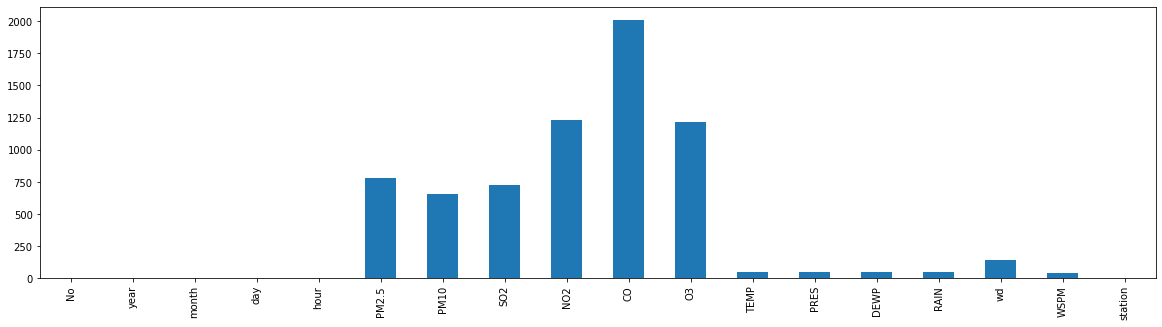

In [166]:
data1.isnull().sum().plot(kind='bar',figsize=(20,5))
plt.show()

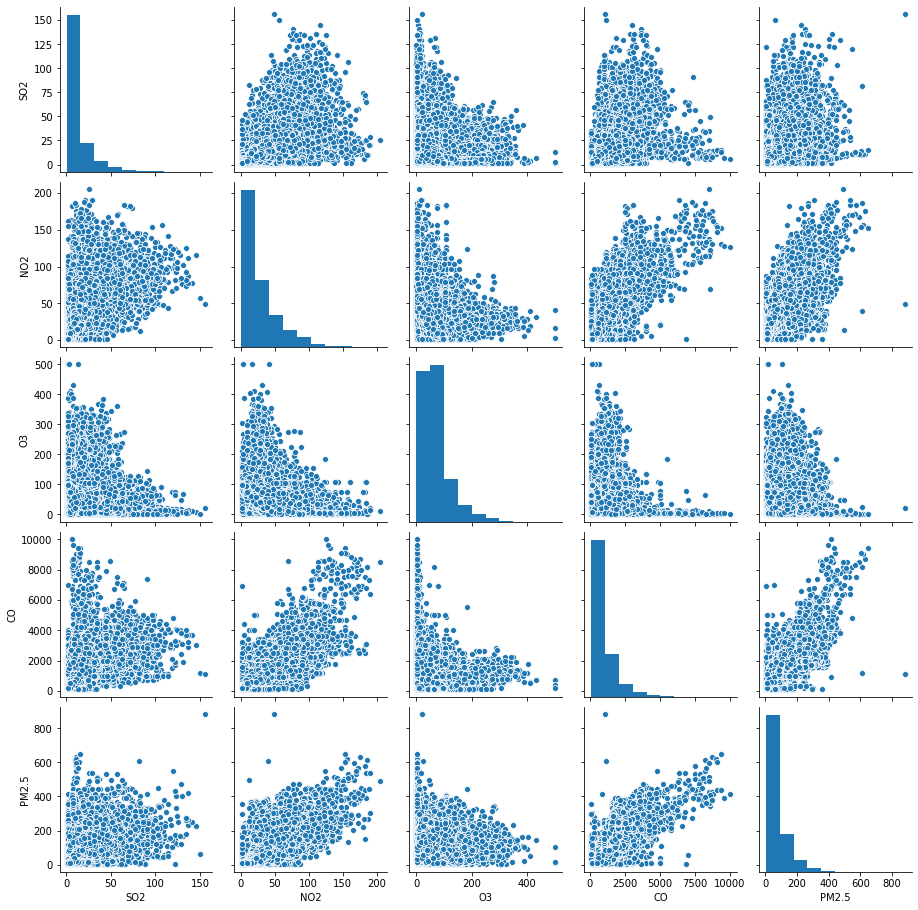

In [167]:
g = sns.pairplot(data1[['SO2','NO2','O3','CO','PM2.5']])

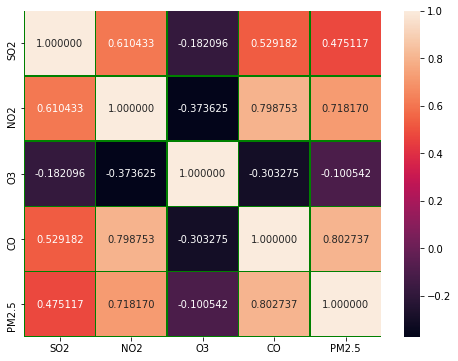

In [173]:
g = sns.heatmap(data1[['SO2','NO2','O3','CO','PM2.5']].corr(method='pearson'),annot=True,fmt='f',linecolor='g',linewidths=0.4)
plt.show()

In [174]:
data1.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'),min=('PM2.5','min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

## Auto-Correlation Plot.

In [175]:
data2 = data1.copy()
data2 = data2.dropna()

#For the analysis we are droping the null values otherwise we can not drop null values.

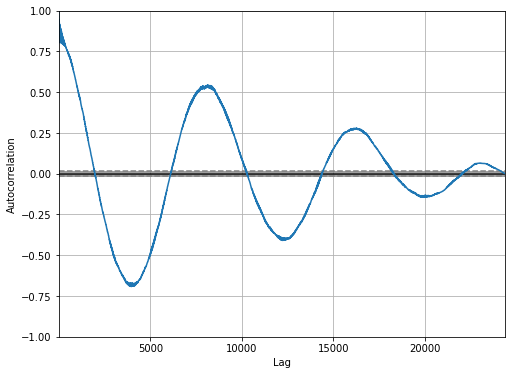

In [176]:
pd.plotting.autocorrelation_plot(data2['2014':'2016']['TEMP'])

#In the autocorrelation measure the linear relation between the lagged values of the time series.
#If see the below graph there some autocorrelation is moving up and down along with Lag
#In between the 0 to 300 is high and then it is  upto -0.60 and then agian it takes the upward jump shows that auto-correlation high inbetween the 6000 to 8000 hours.
#Since the data is having  the yearwise seasonality because At the every end of year the autocorrelation is at its high.
#As the year are increasing the auto-correlation is geting decreasing.

In [180]:
yearly_hours=365*24 
quaterly_hours = (365*24)/4
print(yearly_hours)
print(quaterly_hours)

8760
2190.0


The above graph not showing any inferencial graph we can scale down as per our convenience.

In [186]:
monthly_sample = data1.resample('M').mean()

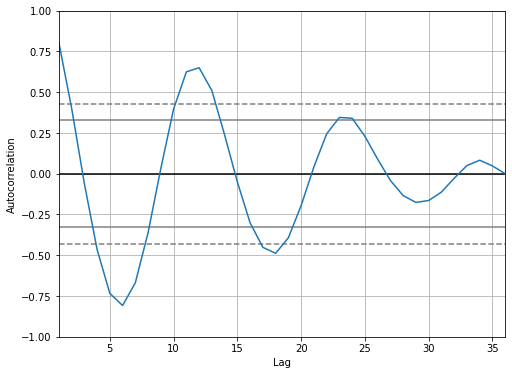

In [187]:
pd.plotting.autocorrelation_plot(monthly_sample['2014':'2016']['TEMP'])
plt.show()

#Now it is pretty much clear
# The grey color line is the cofidence interval
#It is showing two year seasonality
#Strong lines (Grey) is the 90% of confidece interval
#AS the dotted line is the 95% of the cofidence interval.
#Grey line shows the straight of the relationship

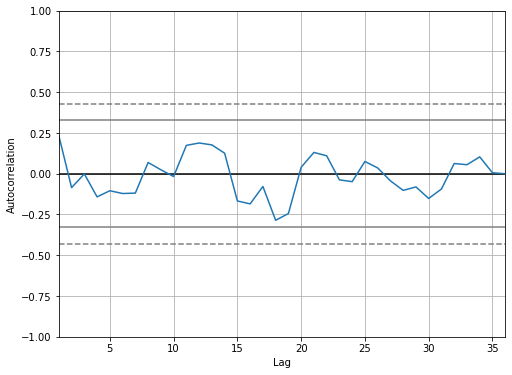

In [188]:
pd.plotting.autocorrelation_plot(monthly_sample['2014':'2016']['PM2.5'])
plt.show()

## Thank You !!